In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('RankUniversity.csv')
df.describe().round(3)

# ¿Cuál es el promedio de teaching?  37.801
# ¿Cuál es el promedio de research? 35.910


,teaching,research,citations,student_staff_ratio,year
count,2603.000,2603.000,2603.000,2544.000,2603.000
mean,37.801,35.910,60.922,18.445,2014.076
std,17.604,21.255,23.073,11.459,1.686
min,9.900,2.900,1.200,0.600,2011.000
25%,24.700,19.600,45.500,11.975,2013.000
50%,33.900,30.500,62.500,16.100,2014.000
75%,46.400,47.250,79.050,21.500,2016.000
max,99.700,99.400,100.000,162.600,2016.000


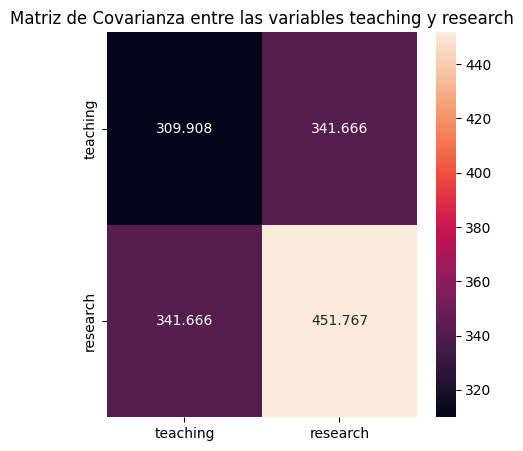

In [40]:
# 2)Calcula la matriz de covarianza de las variables, graficala con un efecto de mapa de calor, 
# agrega título al grafico.

cov_matrix = df[['teaching', 'research']].cov()
cov_matrix

#Guardamos la matriz de covarianza en una imagen
plt.figure(figsize=(5,5))
sns.heatmap(cov_matrix, annot=True, fmt='g')
plt.title('Matriz de Covarianza entre las variables teaching y research')
plt.savefig('cov_matrix.png')
plt.show()

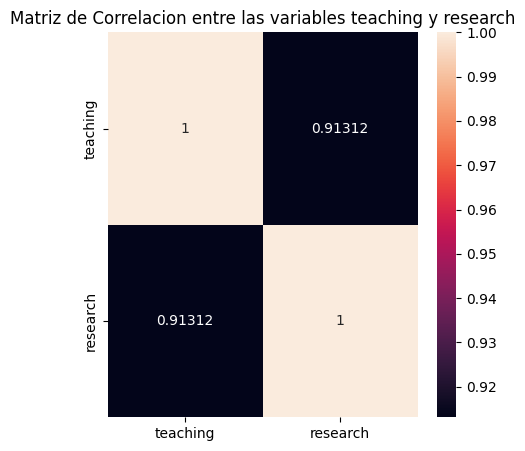

In [41]:
# 3)	Calcula la matriz de correlación de las variables, graficala con un efecto de mapa de calor, 
# copia y pega tu resultado aquí, agrega título al grafico.

cor_matrix = df[['teaching', 'research']].corr()
cor_matrix

#Guardamos la matriz de correlacion en una imagen
plt.figure(figsize=(5,5))
sns.heatmap(cor_matrix, annot=True, fmt='g')
plt.title('Matriz de Correlacion entre las variables teaching y research')
plt.savefig('cor_matrix.png')
plt.show()

Text(0.5, 1.0, 'Diagrama de dispersión entre teaching y research')

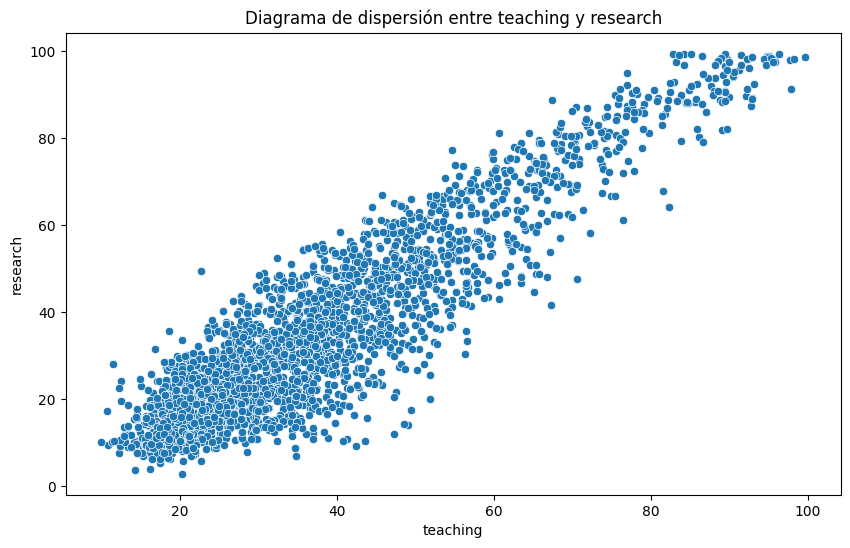

In [42]:
# 4)	Realiza el diagram de dispersión entre las dos variables, copia y pega tu resultado aquí, 
# debe contener titulo de gráfico y de ejes. 

plt.figure(figsize=(10, 6))
sns.scatterplot(x='teaching', y='research', data=df)
plt.title('Diagrama de dispersión entre teaching y research')

In [43]:
# 5)	Con base a la imagen anterior ¿cuántos componentes crees que sean necesarios 
# para capturar la mayor varianza entre las dos variables? = 1 

In [44]:
# 6)	Realiza el análisis de componentes principales creando dos componentes. 
# Copia y pega aquí la varianza explicada por los dos componetes.

#Calculamos el PCA
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA


# Crear un DataFrame
university_df = pd.DataFrame(df)

# Aplicar PCA a las dos variables
pca = PCA(n_components=2)
pcs = pca.fit(university_df[['teaching', 'research']])

# Mostrar resumen de la varianza explicada
print("Varianza explicada por cada componente principal:")
print(pca.explained_variance_ratio_)

# Matriz de rotación (componentes principales)
print("\nMatriz de rotación:")
print(pca.components_)

# Obtener los scores de los primeros 5 datos
scores = pca.transform(university_df[['teaching', 'research']])
print("\nPrimeras 5 filas de los scores:")
print(scores[:5])

Varianza explicada por cada componente principal:
[0.95813567 0.04186433]

Matriz de rotación:
[[ 0.63116397  0.77564943]
 [ 0.77564943 -0.63116397]]

Primeras 5 filas de los scores:
[[87.77093236  8.3809143 ]
 [85.96564982  7.27143022]
 [80.90947997 11.51467738]
 [86.42191314  7.67370348]
 [79.65704629  3.63804042]]


In [45]:
university_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2603 non-null   object 
 5   research                2603 non-null   float64
 6   citations               2603 non-null   float64
 7   income                  2603 non-null   object 
 8   total_score             2603 non-null   object 
 9   num_students            2544 non-null   object 
 10  student_staff_ratio     2544 non-null   float64
 11  international_students  2536 non-null   object 
 12  female_male_ratio       2370 non-null   object 
 13  year                    2603 non-null   int64  
dtypes: float64(4), int64(1), object(9)
memor

In [ ]:
# 7)	Quita todas las variables no numericas, los valores nulos y las observaciones duplicadas de la base de datos. 
# Copia y pega aquí las 3 lineas de código que utilizaste.

#Ahora realizamos el PCA para todas las variables numericas
# las variables numericas son
university_df2 = pd.DataFrame(df)
university_df2 = university_df2.drop(['world_rank', 'university_name', 'country', 'international', 'income', 'total_score', 'num_students', 'international_students', 'female_male_ratio'], axis=1)
university_df2 = university_df2.dropna()
university_df2 = university_df2.drop_duplicates()
university_df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2544 entries, 0 to 2602
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   teaching             2544 non-null   float64
 1   research             2544 non-null   float64
 2   citations            2544 non-null   float64
 3   student_staff_ratio  2544 non-null   float64
 4   year                 2544 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 119.2 KB


In [47]:
# 8)	¿Qué otra variable quitarías antes de realizar el análisis?  YEAR 
# 9)	¿Por qué? Porque es una variable que no aporta información relevante para el análisis de componentes principales, es algo caracteristico de la base de datos pero no aporta información relevante para el análisis de componentes principales.
university_df2 = university_df2.drop(['year'], axis=1)


In [48]:
# 10)	Realiza el PCA con 4 componentes. Copia y pega aquí la varianza explicada por cada componente principal.

# Aplicar PCA con 4 componentes principales
pca2 = PCA(n_components=4)
pca2.fit(university_df2)

# Mostrar resumen de la varianza explicada
print("Varianza explicada por cada componente principal:")
print(pca2.explained_variance_ratio_)

Varianza explicada por cada componente principal:
[0.69066936 0.20239628 0.08664241 0.02029195]


In [49]:
# 11)	Explica tu resultado ¿cuántos PCA necesitas para poder explicar la mayor variabilidad? 
# Cuantos PCA se necesita para explicar la mayor variabilidad es 2, ya que con 2 componentes principales se explica casi el 90% de la varianza de los datos.

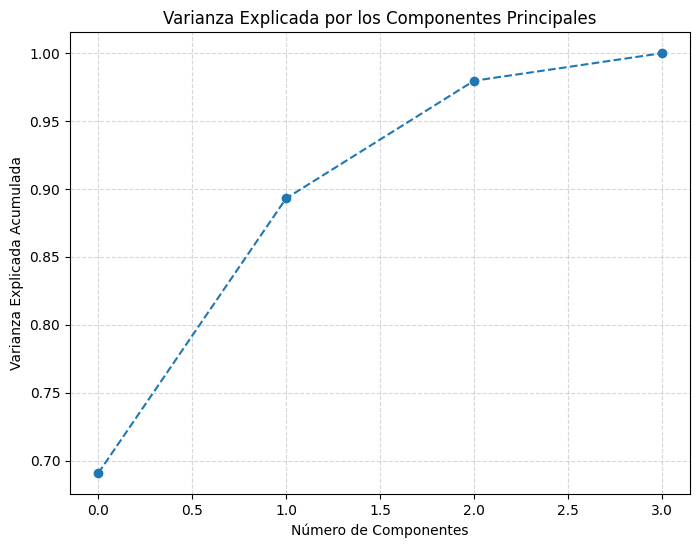

In [ ]:
# 12)	Gráfica la varianza explicada por lo PC. Copia y pega aquí la gráfica. 
# ¿cuántos componentes indica la gráfica que son suficientes? 2

# Graficar la varianza explicada acumulada
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca2.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada por los Componentes Principales')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [ ]:
# 13)	¿Por qué variables están compuestos principalmente el PC1 y PC2?
# El PC1 esta compuesto principalmente por teaching, mientras que el PC2 esta compuesto principalmente por citations

# Obtener las primeras 5 columnas de la matriz de rotación (componentes principales)
rot_1_5 = pca2.components_.T[:, :5]

# Crear un DataFrame con los nombres originales de las variables
rot_df = pd.DataFrame(rot_1_5, index=university_df2.columns, columns=[f'PC{i+1}' for i in range(4)])

# Mostrar la matriz de rotación formateada
print("Primeras 5 columnas de la matriz de rotación con nombres de variables:")
print(rot_df)

Primeras 5 columnas de la matriz de rotación con nombres de variables:
                          PC1       PC2       PC3       PC4
teaching             0.504334 -0.383499 -0.030097  0.773091
research             0.619935 -0.444974  0.189858 -0.617764
citations            0.593734  0.804394 -0.017584  0.011013
student_staff_ratio -0.093846  0.088753  0.981193  0.143447


In [52]:
# 14)	¿Crees que es necesario normalizar las variables? 
# Si, es necesario normalizar las variables para que todas tengan la misma escala y se puedan comparar entre si.

In [53]:
# 15)	Normaliza las variables, vuelve hacer el PCA para 4 componentes, 
# copia y pega aquí la nueva varianza explicada por cada componente.

#Normalizamos los datos y volvemos a calcular el PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Normalizar los datos (media 0, desviación estándar 1)
scaler = StandardScaler()
university_df2_scaled = scaler.fit_transform(university_df2)

# Aplicar PCA con los datos normalizados
pca2 = PCA(n_components=4)
pca2.fit(university_df2_scaled)

# Obtener los scores (datos transformados)
scores = pca2.transform(university_df2_scaled)

# Mostrar la varianza explicada por cada componente
print("Varianza explicada por cada componente principal:")
print((pca2.explained_variance_ratio_).round(2))

# Matriz de rotación con nombres de variables
rot_df = pd.DataFrame(pca2.components_.T, index=university_df2.columns, columns=[f'PC{i+1}' for i in range(4)]).round(2)
print("\nMatriz de rotación:")
print(rot_df)

Varianza explicada por cada componente principal:
[0.6  0.23 0.15 0.02]

Matriz de rotación:
                      PC1   PC2   PC3   PC4
teaching             0.60  0.06 -0.36  0.71
research             0.60  0.16 -0.35 -0.70
citations            0.46  0.24  0.85  0.02
student_staff_ratio -0.25  0.96 -0.13  0.07


In [ ]:
# 16)	Ahora ¿por qué variables están compuestos los PC1 y PC2?
# El PC1 esta compuesto principalmente por teaching y research, mientras que el PC2 esta compuesto principalmente por  staff ratio

In [ ]:
# 17)	¿Cambiaron a los obtenidos anteriormente? 
# Si, cambiaron los resultados, el PC2 ahora esta compuesto principalmente por staff ratio, mientras que antes estaba compuesto principalmente por citations.

# ¿cuál crees que sea una mejor técnica para reducir variables con o sin normalizar las variables?
# La mejor técnica para reducir variables es normalizar las variables, ya que se obtienen resultados más precisos y se pueden comparar entre si.